In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

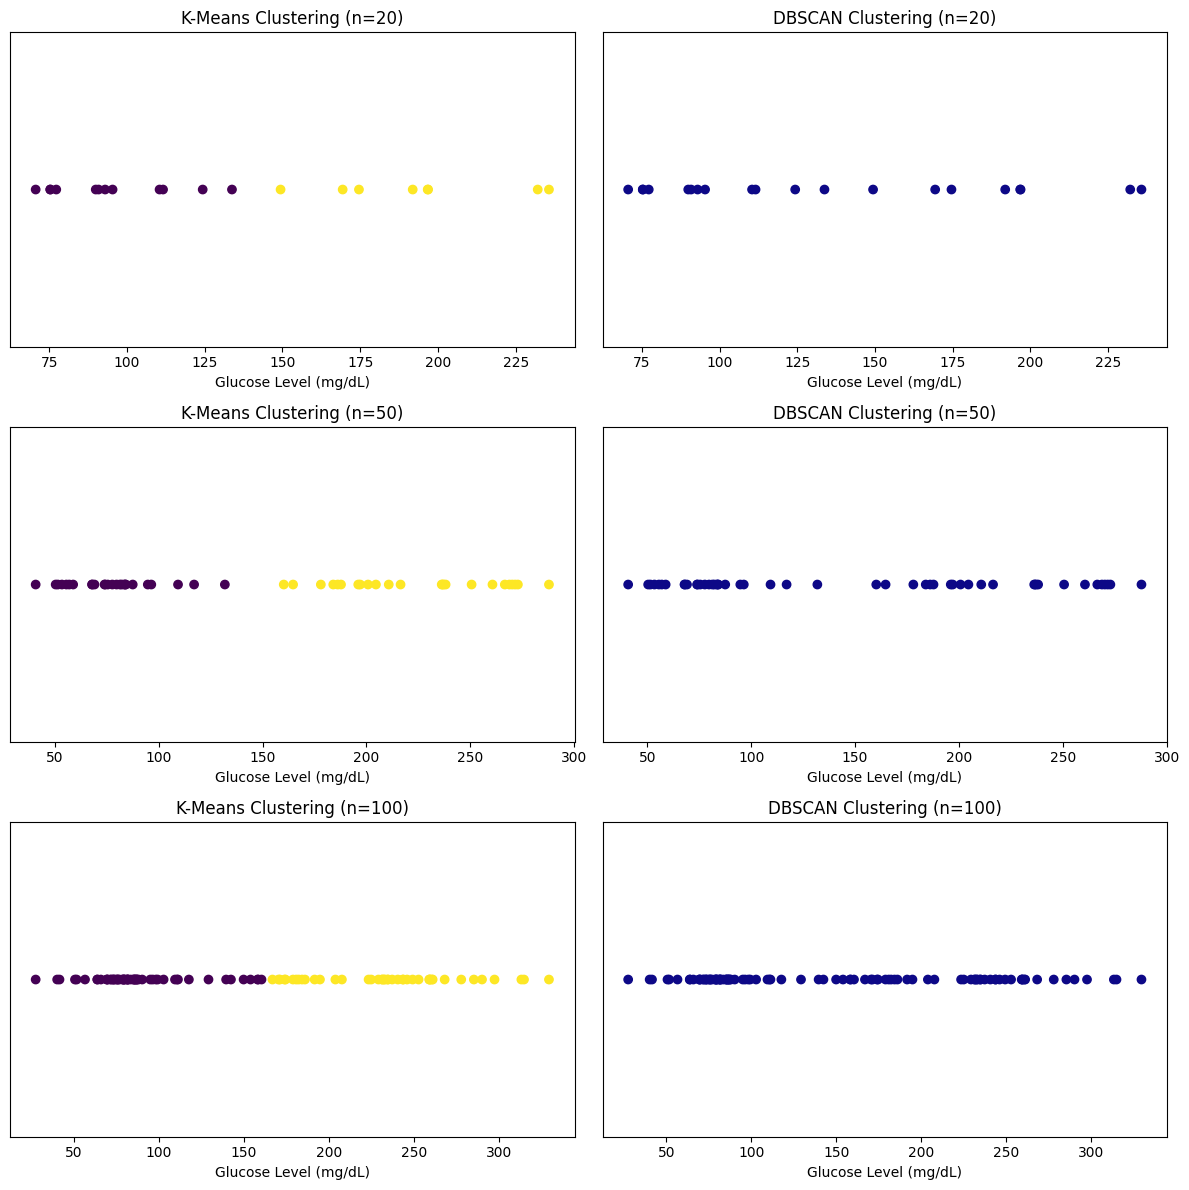

In [3]:
# For reproducibility
np.random.seed(42)

# Sample sizes to test
sample_sizes = [20, 50, 100]

# Parameters for the two distributions
normal_params = {'mean': 80, 'std': 20}
hyper_params = {'mean': 220, 'std': 50}

# Prepare plots
fig, axes = plt.subplots(len(sample_sizes), 2, figsize=(12, 12))

for i, n in enumerate(sample_sizes):
    # Generate data
    normal_data = np.random.normal(loc=normal_params['mean'], scale=normal_params['std'], size=n//2)
    hyper_data = np.random.normal(loc=hyper_params['mean'], scale=hyper_params['std'], size=n//2)
    glucose_values = np.concatenate([normal_data, hyper_data]).reshape(-1, 1)

    # Standardize for DBSCAN
    scaler = StandardScaler()
    glucose_scaled = scaler.fit_transform(glucose_values)

    # K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(glucose_values)

    axes[i, 0].scatter(glucose_values, np.zeros_like(glucose_values), c=kmeans_labels, cmap='viridis')
    axes[i, 0].set_title(f'K-Means Clustering (n={n})')
    axes[i, 0].set_xlabel('Glucose Level (mg/dL)')
    axes[i, 0].set_yticks([])

    # DBSCAN clustering
    dbscan = DBSCAN(eps=0.8, min_samples=2)  # eps chosen heuristically for 1D
    dbscan_labels = dbscan.fit_predict(glucose_scaled)

    axes[i, 1].scatter(glucose_values, np.zeros_like(glucose_values), c=dbscan_labels, cmap='plasma')
    axes[i, 1].set_title(f'DBSCAN Clustering (n={n})')
    axes[i, 1].set_xlabel('Glucose Level (mg/dL)')
    axes[i, 1].set_yticks([])

plt.tight_layout()
plt.show()

In [4]:
def gaussian_pdf(x, mean, var):
    coef = 1.0 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(- (x - mean)**2 / (2 * var))
    return coef * exponent
